The Proportion of the leases in each year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os




In [2]:
df = pd.read_csv("Leases.csv")
print(df.head())

 

   year quarter  monthsigned   market            building_name  \
0  2018      Q1          1.0  Atlanta  10 Glenlake North Tower   
1  2018      Q1          1.0  Atlanta            100 City View   
2  2018      Q1          1.0  Atlanta            1000 Parkwood   
3  2018      Q1          1.0  Atlanta           1100 Circle 75   
4  2018      Q1          1.0  Atlanta             1200 Ashwood   

                                         building_id                address  \
0  Atlanta_Central Perimeter_Atlanta_10 Glenlake ...     10 Glenlake Pky NE   
1  Atlanta_Northwest_Atlanta_100 City View_3330 C...   3330 Cumberland Blvd   
2  Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...   1000 Parkwood Cir SE   
3  Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...  1100 Circle 75 Pky SE   
4  Atlanta_Central Perimeter_Atlanta_1200 Ashwood...       1200 Ashwood Pky   

  region     city state  ...  overall_rent direct_available_space  \
0  South  Atlanta    GA  ...     24.345689                 

In [3]:
year_counts = df['year'].value_counts()
print(year_counts)

year
2019    32311
2018    32251
2024    27744
2021    27524
2022    27016
2023    26312
2020    21527
Name: count, dtype: int64


Text(0.5, 1.0, 'Leases Proportions of the years')

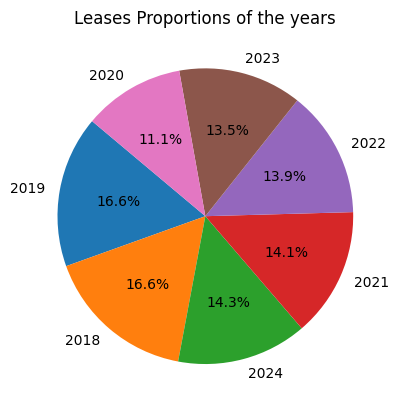

In [4]:
plt.pie(year_counts, labels = year_counts.index, autopct = '%1.1f%%', startangle = 140)
plt.title("Leases Proportions of the years")

In [5]:
# Atlanta Dataset

atlanta_df = df[df['market'] == "Los Angeles"]
print(atlanta_df.head())

      year quarter  monthsigned       market             building_name  \
1160  2018      Q1          1.0  Los Angeles      100 Corporate Pointe   
1161  2018      Q1          1.0  Los Angeles            11601 Wilshire   
1162  2018      Q1          1.0  Los Angeles            11601 Wilshire   
1163  2018      Q1          1.0  Los Angeles               1358 5th St   
1164  2018      Q1          1.0  Los Angeles  1999 Avenue of the Stars   

                                            building_id  \
1160  Los Angeles_Culver City_Culver City_100 Corpor...   
1161  Los Angeles_Westwood/West LA_Los Angeles_11601...   
1162  Los Angeles_Westwood/West LA_Los Angeles_11601...   
1163  Los Angeles_Santa Monica_Santa Monica_1358 5th...   
1164  Los Angeles_Century City_Los Angeles_1999 Aven...   

                       address region          city state  ...  overall_rent  \
1160      100 Corporate Pointe   West   Culver City    CA  ...     36.958996   
1161       11601 Wilshire Blvd   West   

In [6]:
city_counts = atlanta_df['city'].value_counts() 

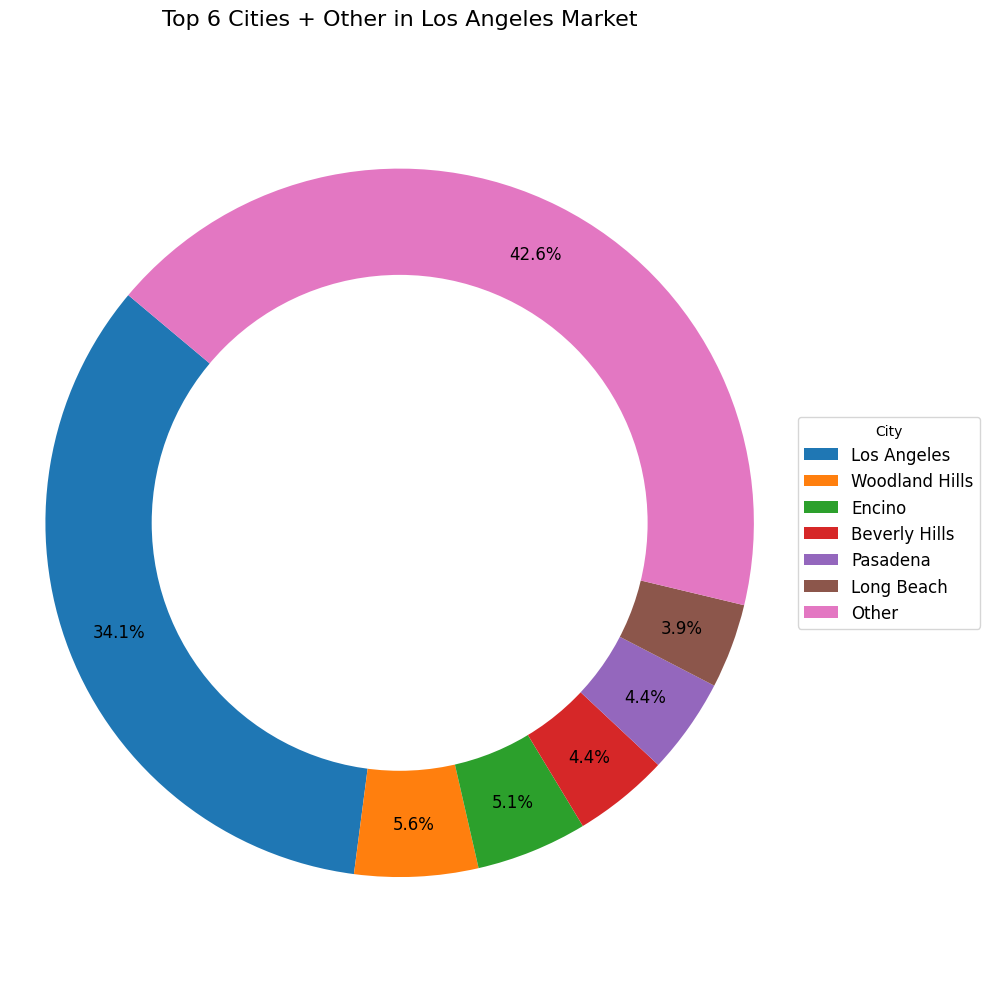

In [7]:
top6_cities = city_counts.head(6)
other_count = city_counts.sum() - top6_cities.sum()
top6_cities['Other'] = other_count
plt.figure(figsize=(10,10))

wedges, texts, autotexts = plt.pie(
    top6_cities,
    labels = None,
    autopct = '%1.1f%%',
    startangle = 140,
    textprops = {'fontsize': 12},
    pctdistance = 0.85
)


centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.legend(
    labels = top6_cities.index,
    loc = "center left",
    bbox_to_anchor = (1, 0.5),
    fontsize =  12,
    title = 'City'
)


plt.title('Top 6 Cities + Other in Los Angeles Market', fontsize = 16, pad = 30)
plt.axis('equal')
plt.tight_layout()


plt.savefig("Los_Angeles_Top6_PieChart.png", dpi=300)
plt.show()

In [8]:
# Darw the pie chart of the proportion of the company in Atlanta
company_counts = atlanta_df['company_name'].value_counts().dropna() 

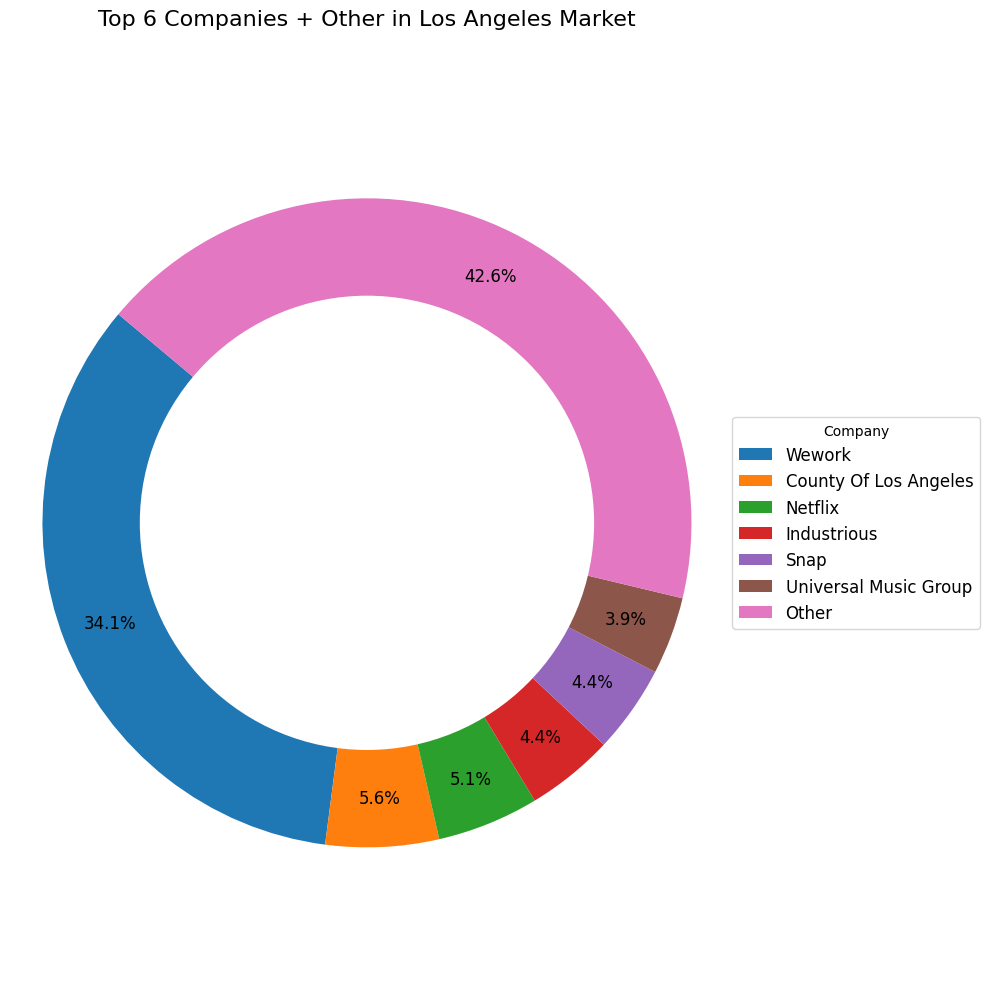

In [9]:
top6_companies = company_counts.head(6)
other_count = company_counts.sum() - top6_companies.sum()
top6_companies['Other'] = other_count
plt.figure(figsize=(10,10))

wedges, texts, autotexts = plt.pie(
    top6_cities,
    labels = None,
    autopct = '%1.1f%%',
    startangle = 140,
    textprops = {'fontsize': 12},
    pctdistance = 0.85
)


centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.legend(
    labels = top6_companies.index,
    loc = "center left",
    bbox_to_anchor = (1, 0.5),
    fontsize =  12,
    title = 'Company'
)


plt.title('Top 6 Companies + Other in Los Angeles Market', fontsize = 16, pad = 30)
plt.axis('equal')
plt.tight_layout()


plt.savefig("Los_Angeles_Top6_Companies_PieChart.png", dpi=300)
plt.show()

In [10]:
# Draw the bar hsitogram of each quarter of each year

import seaborn as sns

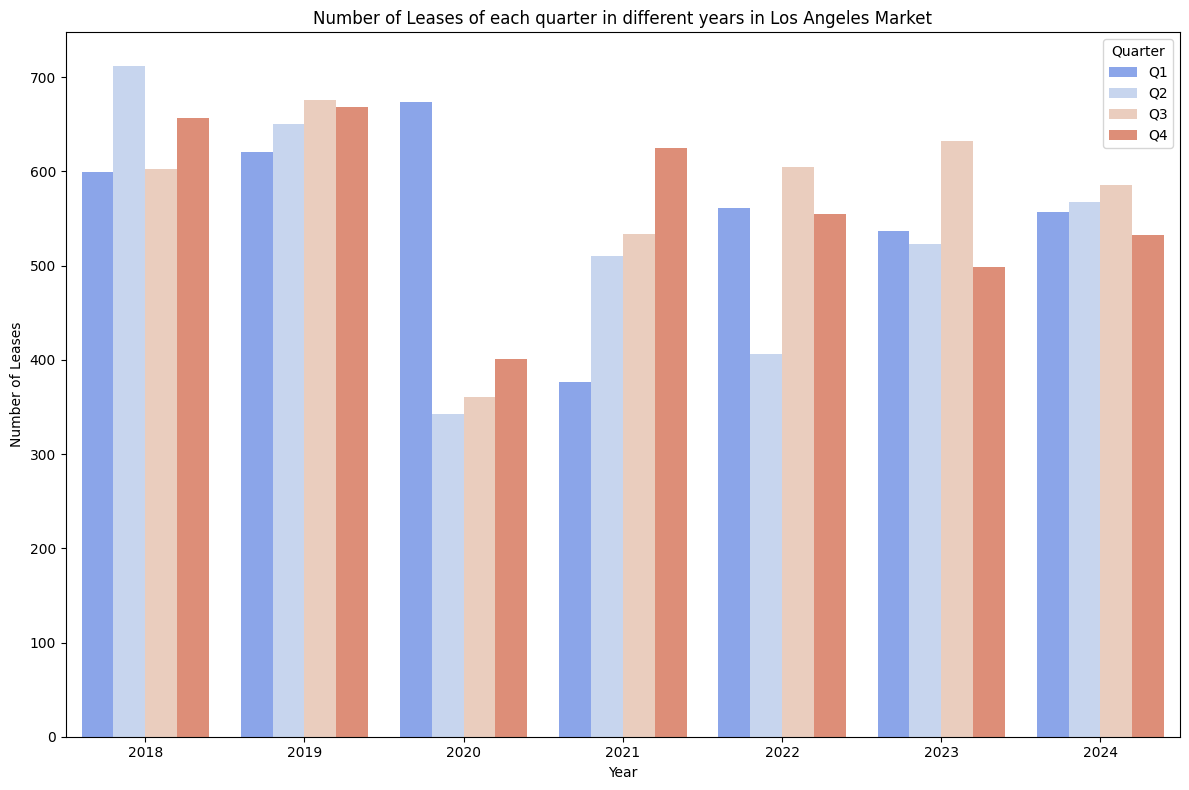

In [16]:
lease_counts = atlanta_df.groupby(['year', 'quarter']).size().reset_index(name = 'lease_count')

quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
lease_counts['quarter'] = pd.Categorical(lease_counts['quarter'], categories = quarter_order, ordered = True)

plt.figure(figsize=(12,8))


custom_colors = ['#FF5733', '#33C1FF', '#9D33FF', '#33FF57']
sns.barplot(data = lease_counts, x = 'year', y = 'lease_count', hue = 'quarter', palette = "coolwarm")

plt.xlabel('Year')
plt.ylabel('Number of Leases')
plt.title('Number of Leases of each quarter in different years in Los Angeles Market')
plt.legend(title = 'Quarter')
plt.tight_layout()


plt.savefig('Los_Angeles_Lease_Counts_Quarter_BarChart.png', dpi=300)
plt.show()

In [12]:
# Create Line Chart

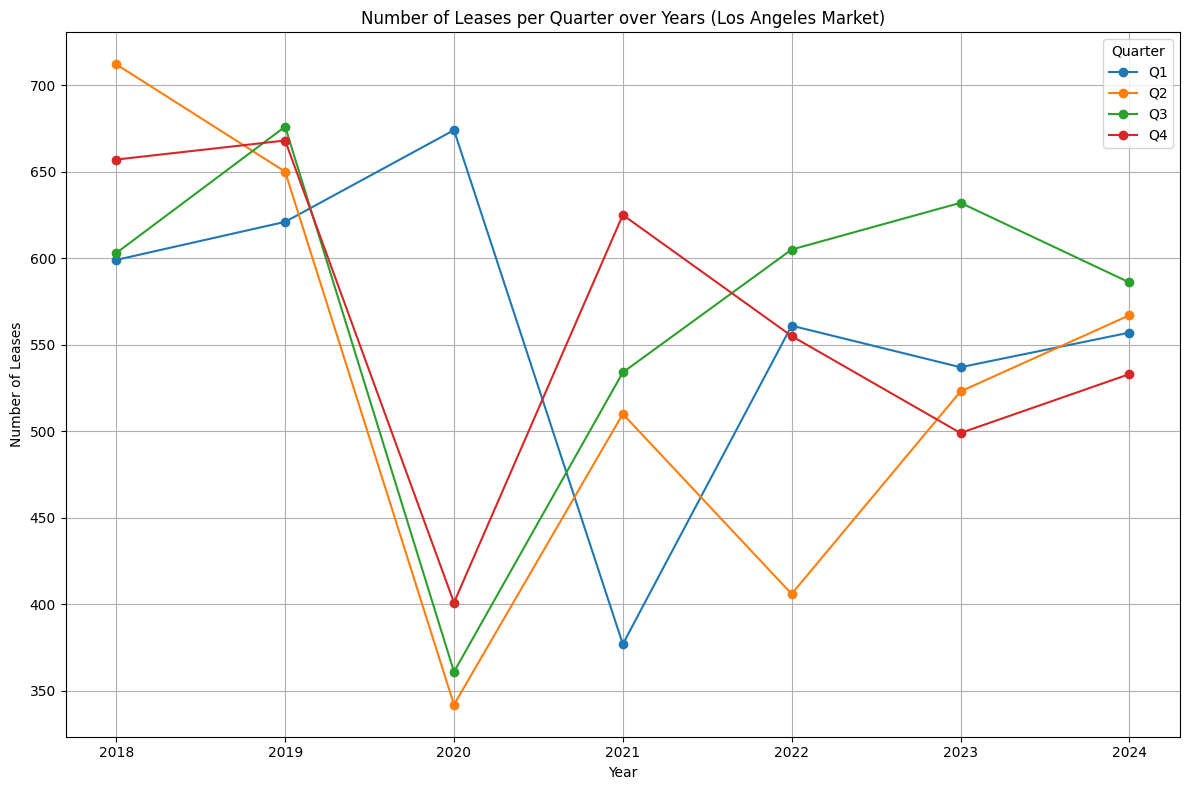

In [15]:
lease_pivot = lease_counts.pivot(index = 'year', columns = 'quarter', values = 'lease_count')
#lease_pivot

plt.figure(figsize=(12,8))

for quarter in quarter_order:
    plt.plot(lease_pivot.index, lease_pivot[quarter], marker = 'o', label = quarter)

plt.xlabel('Year')
plt.ylabel('Number of Leases')
plt.title('Number of Leases per Quarter over Years (Los Angeles Market)')
plt.legend(title='Quarter')
plt.grid(True)
plt.tight_layout()

plt.savefig("Los_Angeles_lease_quarter_lineChart.png", dpi = 300)
plt.show()

In [14]:
# unemployment rate of Grogria state

df = pd.read_csv("Georia Unemployment.csv")
unemployment_clean = pd.read_csv("Georia Unemployment.csv", skiprows = 12)

columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
unemployment_clean.columns = columns

unemployment_long = unemployment_clean.melt(id_vars = 'Year', var_name = 'Month', value_name = 'Unemployment Rate')
unemployment_long['Year'] = unemployment_long['Year'].astype(str)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
unemployment_long['Month'] = pd.Categorical(unemployment_long['Month'], categories=month_order, ordered=True)

plt.figure(figsize = (14, 8))

for year in unemployment_long['Year'].unique():
    yearly_data = unemployment_long[unemployment_long['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Unemployment Rate'], marker='o', label=year)

plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate per Year Across Months (Georgia)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.savefig("Unemployment Rate.png", dpi = 300)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'DataFest/Georia Unemployment.csv'

In [ ]:
 #!pip install pandas

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install seaborn